  # Introduction
 
 ## Multi class classification a.k.a The clothing condundrum
 
 
A problem that often comes up in machine leanring is one of classificaiton. Given a set of input, can we group it into a predefined set such as ' puppies ' or ' ice cream ' etc.? 
## More classes, more problems
When given a larger variety of input and output, how well could a machine learning algortihm perform? Especailly with abstract shapes.
Here in this notebook I will attempt to train a model that can distugniosh not between just two similar objects, but multiple objects each with variations of their size and shape, namely clothes! 
## Why clothes?
Well for one thing there is a readily availble dataset for them, but also it does present a diffcult challenge for a computer. Think of a t-shirt. Some have patters, while others do not. There is also the types with v-necks and regular necks, but both are still shirts. Would a trained model be able to navigate through the many subtle variations of clothing and correctly figure out which are the most important features?

# Defining the Problem

Ever not understand what type of clothing you are looking at? I know I do. Well today we are going to attempt to solve that to blend in as normal humans! What I will attempt to do is to create a model that, looking at the fashion mnsit data set, will be able to classify pictures of clothes into 10 catagories ( 'T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'Sneaker','Bag', and'Ankle boot' ) and accurately predict what picutre it is likely to be based on that photo.

## Input data

The input data will be the imaged from the fashion mnist dataset. So that means we will be working with an array of pixels whose value is between 0 and 255. 

# Installing our packages and getting our dataset
Below is where we get the packages we will be working with, namely keras, the fashion_mnist dataset and models. We will also be getting numpy and matplotlib to help us look a bit closer at some of the data as well as using the sklearn train_test_split to seperate our data into tesstin and training sets

In [1]:
import keras
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint   

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2022-03-11 10:19:39.643404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-11 10:19:39.643420: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Methodology 

Below I have outlined the chosen evaluation for the models performance as well as my reasoning behind it. To help clairfy further, there is also a section describing the various functions that were made in order to preapre the data, train the function and measure our success ( or lack there of ) of our training.

# Deciding our measure of success and evaluation protocol
So now that we have our dataset, and our question, we must figure out how we know we have done a good job.
## Accuracy, because a shirt should be a shirt
I have chosen accuracy to be our model of testing how well we have done ( in the 'metrics' argument of compile ) as what we really want to know is whether or not we have correctly identfied the clothes we are looking through. It is pretty simple as all we need to know is the number of correct predictions versus the number of incorrect predicitons.

# Our helper functions
To help keep the code clean and modular, below are functions that have been made to help us along. Here I will explain what they do.

## get_accuracy
Here we simple get the accuracy of the model and print it out as a percentage.

## define_architecture
Here is where we build the model. As you can see the model is made of three convolutional layers a two dense layers and we make use of maxpooling and dropout to ( hopefully ) up the accuracey and lower the chances of overfitting.

## train
Where the magic happens. We take our freshly made model and train it, passing in our metric we have deicded for success, which in this case is accuracey. This function will also print our the accuracy of the model before training we we can compare it with the model performance after.

## viz_sample
Take a quick look at the data sample.


In [12]:
def get_accuracy(model):
    # before training accuracy on validation set
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    percent = round(score * 100, 2)
    ratio = round(len(X_test) * score)

    print(f'Validation accuracy: {percent}% ({ratio}/{len(X_test)})')


def define_architecture():
    model = Sequential()
    
    # Three convoultional layes; maxpooling to make a downsampled feature map
    model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                            input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
        
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))

    model.summary()    
    return model


def train(model, bs=128, epochs=20, valid_split=0.2,
          checkpoint='fashion_mnist.hdf5', verbose=True):

    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                      metrics=['accuracy'])
    
    print('\n\nAccuracy before training')
    get_accuracy(model)
    
    checkpointer = ModelCheckpoint(filepath=checkpoint, 
                                   verbose=1, save_best_only=True)
    
    model.fit(X_train, y_train, batch_size=bs, epochs=epochs,
              validation_split=valid_split, callbacks=[checkpointer],
              verbose=verbose, shuffle=True)
    

In [3]:
def viz_sample(X, y, model=None):
    num_gen = lambda x: np.random.randint(0, len(X))
    
    if not model:
        fig, ax = plt.subplots(1, 5, figsize=(10, 7))

        for idx in range(5):
            N = num_gen(1)
            ax[idx].imshow(X[N], cmap='gray')
            ax[idx].set_title(labels[y[N]], fontsize=14)
            
    else:
        # show predictions
        fig = plt.figure(figsize=(20, 8))
        fig.suptitle('True/Predicted values', fontsize=18)
        
        for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
            ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
            ax.imshow(np.squeeze(X_test[idx]), cmap='gray')
            pred_idx = np.argmax(y_hat[idx])
            true_idx = np.argmax(y_test[idx])
            ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                         color=("green" if pred_idx == true_idx else "red"))

    plt.show()


# Preparing the data

Below are the steps taken to get the data ready and to check it out. First we load up the data and split into testing and training groups, then we must set our labels, which will be our output. Then we check on the data with viz_sample.
And at last we get to our preprocessing phase where we rescale the data so that the inputs will be between 0 - 1 and using one hot encoding for our outputs.

### Load and split

First, we need to get the data that we are going to work with. Here, I am using Fashion MNIST dataset since it's a little bit more difficult that MNIST, so that it gives enough challenge and is doable at the same time. One alteration I'm going to introduce is the validation split addition; it's important to know how the data does in the training stage. And we will hold out the test set for the very end and not touch it until then. 

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f'Train dataset consists of {len(X_train)} instances')
print(f'Test dataset consists of {len(X_test)} instances')

Train dataset consists of 60000 instances
Test dataset consists of 10000 instances


### Prepare the labes and Visualize 
Here I have listed the labels that the model will be using. Below there is a quick look at a sample of the training data to make sure everything is so far working ( not a given when I code! )

In [5]:
# get the corresponsing labels 

labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

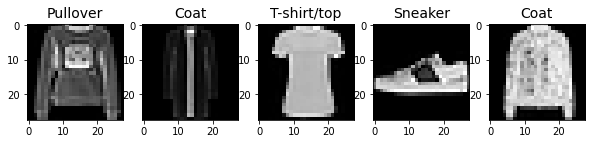

In [6]:
viz_sample(X_train, y_train)

### Preprocessing

The input values the model expects should be between 0 and 1, how ever since the data we are dealing with comes from images, we need to scale it back. The pixel data comes in values from 0 - 255, so we assign the type to a 32 bit float and divde it by 255 in order to have it in the expected values. Then we assign it to out training and testing variables.

In [7]:
# rescale images (!)
rescale = lambda x: x.astype('float32') / 255.0

X_train = rescale(X_train)
X_test = rescale(X_test)

### One hot encoding
As I'm sure you are aware, one hot encoding is where we have an array full of zero's where only the correct choice is given as one. Here we have made sure that the training and testing data have been converted to one hot encoding.

In [8]:
# use one-hot encoding for categorical outputs
onehot = lambda y: np_utils.to_categorical(y, 10)

print('Before One-Hot encoding:')
print(y_train[:5])

y_train = onehot(y_train)
y_test = onehot(y_test)

print('\nAfter One-Hot encoding:')
print(y_train[:5])

Before One-Hot encoding:
[9 0 0 3 0]

After One-Hot encoding:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Actually training the model
Now that we have set up our data, out outputs and our model it is time to train it. Below the 'cnn_model' is going to be our training model ( cnn = Convolutional Neural Network )

### Model architecture

As you can see ( You will have to scroll just a bit ) the accuracy before training is only 9.98% ) So we have our baseline. After running though, how good can we get? I hope it is good, I need a hoody!

In [9]:
# CNN
cnn_model = define_architecture()
train(cnn_model, epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

2022-03-11 10:19:55.772203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 10:19:55.772881: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-11 10:19:55.773069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-11 10:19:55.773221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-11 10:19:55.773376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co



Accuracy before training
Validation accuracy: 9.98% (5988/10000)
Epoch 1/25


2022-03-11 10:19:56.786006: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


373/375 [============================>.] - ETA: 0s - loss: 0.6962 - accuracy: 0.7397
Epoch 1: val_loss improved from inf to 0.44457, saving model to fashion_mnist.hdf5
375/375 [==============================] - 9s 24ms/step - loss: 0.6950 - accuracy: 0.7402 - val_loss: 0.4446 - val_accuracy: 0.8413
Epoch 2/25
373/375 [============================>.] - ETA: 0s - loss: 0.4479 - accuracy: 0.8369
Epoch 2: val_loss improved from 0.44457 to 0.36310, saving model to fashion_mnist.hdf5
375/375 [==============================] - 9s 23ms/step - loss: 0.4478 - accuracy: 0.8369 - val_loss: 0.3631 - val_accuracy: 0.8683
Epoch 3/25
375/375 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.8583
Epoch 3: val_loss improved from 0.36310 to 0.32216, saving model to fashion_mnist.hdf5
375/375 [==============================] - 9s 23ms/step - loss: 0.3868 - accuracy: 0.8583 - val_loss: 0.3222 - val_accuracy: 0.8821
Epoch 4/25
373/375 [============================>.] - ETA: 0s - loss: 

# Results

In [13]:
print('Final output:')
get_accuracy(cnn_model)

Final output:
Validation accuracy: 91.15% (9115/10000)


### 91.15%

Wow, not bad. It isn't the best around, but we started from just a bit under 10% to over 90%! Now I can confidnetly go into my wordrobe and be assured I have a less than 10% chance of wearing my pants on my head!

# Conclusions

Well we went from a randoom baseline of just inder 10% to an accuracry rating of over 91%. I'd say this was a farily succesful attempt. But it is still not as high as some models can get, so perhaps some other tweaks could have been made.
### Possible changes for improvement
One thing that comes to mind is we only ran for 25 epochs, so perhaps given more time we would do better. If possible I would also like to have more training data to access to see if that would make any differnce, but I have limited myself to the mnist training set due to the constraints of my time.

### I can find pants
Now at least we know that our future robot overloads will be well dressed! What did you think? What would you do differently? 